# Visual Analytics Final Lab

## Data Import and Data Wrangling



In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
route = "/content/drive/MyDrive/VA_FINAL"
data = pd.read_csv(route+"/brooklyn_sales_map.csv",index_col=0)

In [39]:
data.head()

,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,apartment_number,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,COURT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,NaN,...,NaN,3.000540e+09,12/06/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.577176
3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,NaN,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.447240
4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,NaN,K6,5120 AVENUE U,NaN,...,NaN,0.000000e+00,NaN,1.0,1.0,1.0,17V1.1,0.0,3729.786857,797554.847834
5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,NaN,H8,21 CLARK STREET,NaN,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,620.761169,21360.147631


In [ ]:
data.shape

(390883, 110)

In [ ]:
nulls=data.isnull().sum()
print(nulls)
print((nulls!=0).sum())

borough                         0
neighborhood                    0
building_class_category        83
tax_class                    6934
block                           0
                            ...  
PFIRM15_FL                 363110
Version                     87155
MAPPLUTO_F                  87155
SHAPE_Leng                  87155
SHAPE_Area                  87155
Length: 110, dtype: int64
94


**Eliminating columns with more than 25% (100 000) of missing values**

In [ ]:
nulls = data.isnull().sum()
subset = []
for i in range(len(nulls)):
  if nulls[i] >= 10**5:
    subset.append(data.columns[i]) #getting all the columns to drop
data = data.drop(axis=1, columns=subset) #dropping them
print("removed a number of: {} columns".format(len(subset)))
print(subset)

removed a number of: 20 columns
['easement', 'apartment_number', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'OwnerType', 'Ext', 'HistDist', 'Landmark', 'ZMCode', 'EDesigNum', 'APPDate', 'FIRM07_FLA', 'PFIRM15_FL']


**Eliminating null variables and columns with unique values**

In [ ]:
data = data.dropna()

for col in data.columns:
    if len(data[col].unique()) == 1:
        data=data.drop(col,inplace=False,axis=1)

data.shape

(301220, 84)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301220 entries, 2 to 390880
Data columns (total 84 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   neighborhood             301220 non-null  object 
 1   building_class_category  301220 non-null  object 
 2   tax_class                301220 non-null  object 
 3   block                    301220 non-null  int64  
 4   lot                      301220 non-null  int64  
 5   building_class           301220 non-null  object 
 6   address                  301220 non-null  object 
 7   zip_code                 301220 non-null  int64  
 8   residential_units        301220 non-null  int64  
 9   commercial_units         301220 non-null  int64  
 10  total_units              301220 non-null  int64  
 11  land_sqft                301220 non-null  float64
 12  gross_sqft               301220 non-null  float64
 13  year_built               301220 non-null  int64  
 14  tax_

## Data Transformation

**Date to day, month, year**

In [ ]:
data["sale_date"]=pd.to_datetime(data['sale_date'],format='%Y-%m-%d')
data['year_of_sale']= data['sale_date'].dt.year
data['month_of_sale']= data['sale_date'].dt.month
data['day_of_sale']= data['sale_date'].dt.day

**House prices to present value**

In [ ]:
import numpy as np
r=0.03
data["sale_price"]=data["sale_price"]*np.exp(r*(2022-data['year_of_sale']))

**Removing rows with 0 sale price**

In [ ]:
data =data[data['sale_price'] !=0]

**Exporting to visualize**

This data is now cleaned to do data visualization tasks.

In [ ]:
#data.to_csv("clean_data.csv")

**Normalize**

Normalize everything minus objects and datetime.

In [ ]:
no_normalize = []
for i in range(len(data.columns)):
  if str(data.dtypes[i]) == 'object':
    no_normalize.append(data.columns[i])
no_normalize.append("sale_date")

normalized = data.drop(no_normalize, axis=1, inplace=False)
sale_price=normalized["sale_price"]
normalized=(normalized-normalized.mean())/normalized.std()
#recovering orignial sale price
normalized["sale_price"]=sale_price

Normalized has all data normalized minus objects and datetime.

**Type of variables**

In [ ]:
data.dtypes.value_counts()

float64           58
object            16
int64             11
datetime64[ns]     1
dtype: int64

In [ ]:
objects = []
for i in range(len(data.columns)):
  if str(data.dtypes[i]) == 'object':
    objects.append(data.columns[i])
objects

['neighborhood',
 'building_class_category',
 'tax_class',
 'building_class',
 'address',
 'building_class_at_sale',
 'FireComp',
 'SanitSub',
 'Address',
 'ZoneDist1',
 'SplitZone',
 'BldgClass',
 'OwnerName',
 'IrrLotCode',
 'ZoneMap',
 'Sanborn']

In [ ]:
object_data = data[objects]

In [ ]:
object_data.describe()

,neighborhood,building_class_category,tax_class,building_class,address,building_class_at_sale,FireComp,SanitSub,Address,ZoneDist1,SplitZone,BldgClass,OwnerName,IrrLotCode,ZoneMap,Sanborn
count,192205,192205,192205,192205,192205,192205,192205,192205,192205,192205,192205,192205,192205,192205,192205,192205
unique,60,55,8,152,147251,157,102,33,103633,75,2,148,97956,2,32,1503
top,BEDFORD STUYVESANT,02 TWO FAMILY HOMES,1,D4,"1311 BRIGHTWATER AVENUE, 208",D4,L170,2A,175 ADAMS STREET,R6,N,D4,CLINTON HILL APARTMEN,N,17a,302 014
freq,14126,63383,120677,30849,21,30830,6322,11069,668,39992,180583,30850,723,155105,21559,874


**Removing...**:

The ones that we are going to remove, because there would be too much dummy variables are:
- address with 211263 unique values
- Address with 150165 unique values
- sale_date with 5348 unique values
- OwnerName with 138153
- and all of them with a number greater than 80

However, because some actually provide good info ('address' for instance could actually be used as the 'ids', we are going to remove them for the prediction but store them for later)

In [ ]:
uniques = object_data.describe().iloc[1]
subset = []
subset.append("sale_date")
for i in range(len(uniques)):
  if uniques[i] >= 80: #this will be our threshold
    subset.append(object_data.columns[i]) #getting all the columns to drop
data = data.drop(axis=1, columns=subset,inplace=False) #dropping them
print("removed a number of: {} columns".format(len(subset)))
print(subset)

removed a number of: 9 columns
['sale_date', 'building_class', 'address', 'building_class_at_sale', 'FireComp', 'Address', 'BldgClass', 'OwnerName', 'Sanborn']


**Turning objects into n-ary dummy variables**

In [ ]:
#getting objects again cause we removed some
objects = []
for i in range(len(data.columns)):
  if str(data.dtypes[i]) == 'object':
    objects.append(data.columns[i]) 

In [ ]:
objects

['neighborhood',
 'building_class_category',
 'tax_class',
 'SanitSub',
 'ZoneDist1',
 'SplitZone',
 'IrrLotCode',
 'ZoneMap']

In [ ]:
object_data = data[objects]
object_data.describe()

,neighborhood,building_class_category,tax_class,SanitSub,ZoneDist1,SplitZone,IrrLotCode,ZoneMap
count,192205,192205,192205,192205,192205,192205,192205,192205
unique,60,55,8,33,75,2,2,32
top,BEDFORD STUYVESANT,02 TWO FAMILY HOMES,1,2A,R6,N,N,17a
freq,14126,63383,120677,11069,39992,180583,155105,21559


**Normalized and non-normalized cleaned datasets**

In [ ]:
raw = data.copy()
object_data = pd.get_dummies(object_data)
raw = raw.drop(axis=1, columns=objects)

raw[object_data.columns] = object_data
normalized[object_data.columns]=object_data

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [ ]:
print(raw.shape)
print(normalized.shape)

(192205, 336)
(192205, 336)


## 0. Predicting the sale_price

**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
X = raw.copy()
y = X['sale_price']
X.drop('sale_price', inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
# Our algorithms:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.18409629727054377


**But why is the score so bad? Let's try to see it with a PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

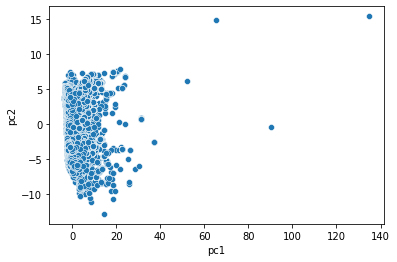

In [ ]:
import seaborn as sns
sns.scatterplot(x=principalDf.pc1, y=principalDf.pc2)

**Conclusion**:

We can see that using a linear regression with this data is not a very good idea because all of it is in the bottom left corner...

## 1. Classifying if the sale_price is above some threshold number (the median)

In [ ]:
stats = raw['sale_price'].describe()
print(stats)
stats['50%']

count    1.922050e+05
mean     1.115681e+06
std      3.543537e+06
min      1.161834e+00
25%      4.282597e+05
50%      7.302583e+05
75%      1.090850e+06
max      4.130400e+08
Name: sale_price, dtype: float64


730258.2674434846

**Linear Regression**

In [ ]:
predict_regression=regr.predict(X_test)
predict_regression=(np.array(predict_regression)>stats['50%'])*1
accuracy_score (y_test>stats['50%'], predict_regression)

0.6906688171483573

**Support Vector Machine (Linear)**

In [ ]:
from sklearn.model_selection import train_test_split

X = normalized.copy()
X['to_predict'] = (X['sale_price'] >=stats['50%']).astype(int)
X = X.drop(axis=1, columns=['sale_price'])
y = X['to_predict']
X.drop('to_predict', inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


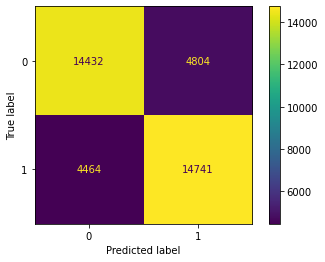

In [ ]:
from sklearn import svm

model_svm =svm.LinearSVC().fit(X_train, y_train)
predict_svm = model_svm.predict(X_test)
plot_confusion_matrix(model_svm, X_test, y_test)
plt.show()

In [ ]:
accuracy_score (y_test, predict_svm)

0.7589032543378164

In [ ]:
print(classification_report(y_test, predict_svm))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     19236
           1       0.75      0.77      0.76     19205

    accuracy                           0.76     38441
   macro avg       0.76      0.76      0.76     38441
weighted avg       0.76      0.76      0.76     38441



**Logistic Regression**

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


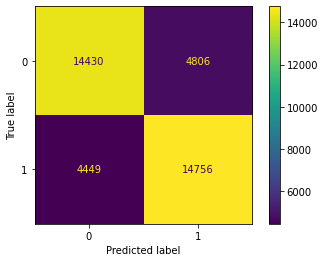

In [ ]:
# Our algorithms:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
predict_logistic = model_logistic.predict(X_test)
plot_confusion_matrix(model_logistic, X_test, y_test)
plt.show()

In [ ]:
accuracy_score (y_test, predict_logistic)

0.7592414349262506

In [ ]:
print(classification_report(y_test, predict_logistic))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     19236
           1       0.75      0.77      0.76     19205

    accuracy                           0.76     38441
   macro avg       0.76      0.76      0.76     38441
weighted avg       0.76      0.76      0.76     38441



**XGBClassifier**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


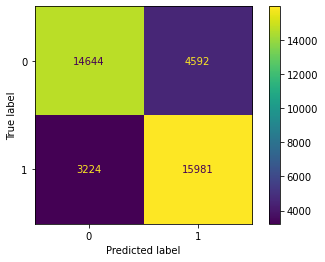

In [ ]:
# Our algorithms:
from xgboost.sklearn import XGBClassifier

model_xgb = XGBClassifier().fit(X_train, y_train)
predict_xgb = model_xgb.predict(X_test)
plot_confusion_matrix(model_xgb, X_test, y_test)
plt.show()

In [ ]:
accuracy_score (y_test, predict_xgb)

0.7966754246767774

In [ ]:
print(classification_report(y_test, predict_xgb))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79     19236
           1       0.78      0.83      0.80     19205

    accuracy                           0.80     38441
   macro avg       0.80      0.80      0.80     38441
weighted avg       0.80      0.80      0.80     38441



**Random Forest**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


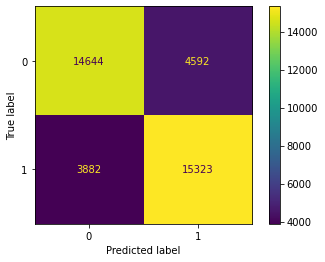

In [ ]:
# Our algorithms:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier().fit(X_train, y_train)
predict_forest = model_forest.predict(X_test)
plot_confusion_matrix(model_forest, X_test, y_test)
plt.show()

In [ ]:
accuracy_score (y_test, predict_forest)

0.7795582841237221

In [ ]:
print(classification_report(y_test, predict_forest))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78     19236
           1       0.77      0.80      0.78     19205

    accuracy                           0.78     38441
   macro avg       0.78      0.78      0.78     38441
weighted avg       0.78      0.78      0.78     38441



**Gradient Boosting**

In [ ]:
from sklearn import datasets, ensemble
model_boost = ensemble.GradientBoostingRegressor()
model_boost.fit(X_train, y_train)
predict_boost = model_boost.predict(X_test)

In [ ]:
predict_boost=np.array(predict_boost)
predict_boost=np.around(predict_boost)
accuracy_score (y_test, predict_boost)

0.7954787856715486

In [ ]:
print(classification_report(y_test, predict_boost))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79     19236
           1       0.78      0.83      0.80     19205

    accuracy                           0.80     38441
   macro avg       0.80      0.80      0.80     38441
weighted avg       0.80      0.80      0.80     38441



**Naive Bayes**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


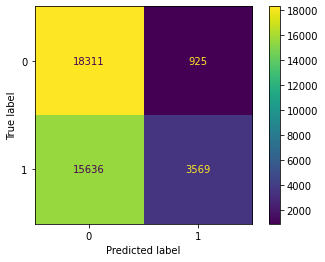

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
predict_nb = model_nb.predict(X_test)

plot_confusion_matrix(model_nb, X_test, y_test)
plt.show()

In [ ]:
accuracy_score (y_test, predict_nb)

0.5691839442262168

In [ ]:
print(classification_report(y_test, predict_nb))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69     19236
           1       0.79      0.19      0.30     19205

    accuracy                           0.57     38441
   macro avg       0.67      0.57      0.49     38441
weighted avg       0.67      0.57      0.50     38441



**Voting by majority**

In [ ]:
print(predict_regression)
print(predict_svm)
print(predict_logistic)
print(predict_xgb)
print(predict_forest)
print(predict_boost)
print(predict_nb)

[1 0 1 ... 1 1 0]
[1 0 1 ... 1 0 1]
[1 0 1 ... 1 0 1]
[1 0 0 ... 1 1 1]
[1. 0. 1. ... 1. 0. 1.]
[0 0 1 ... 0 0 0]


In [ ]:
vote=(predict_svm + predict_logistic + predict_xgb + predict_forest + predict_boost)
vote=(vote>=3)*1

accuracy_score (y_test, vote)

0.7919408964386982

## 1. XAI

**SHAP values of the model that worked better for classifying above the median:  XGB Classifier**

In [ ]:
import shap
shap.initjs() 
explainer=shap.Explainer(model_xgb)
shap_values = explainer(X_test)

**For a concrete value: index=0**

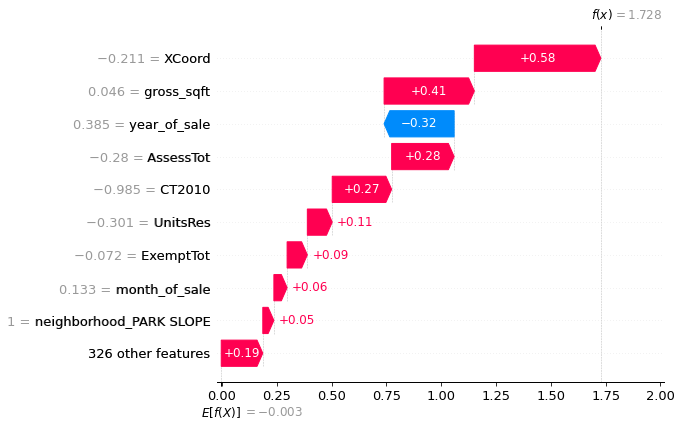

In [ ]:
shap.plots.waterfall(shap_values[0])

**Global variables**

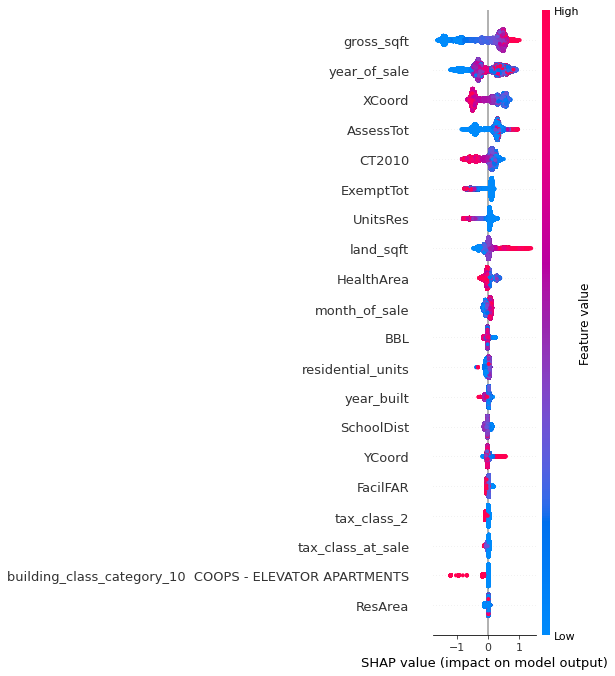

In [ ]:
shap_values=explainer(X)
shap.summary_plot(shap_values, X)

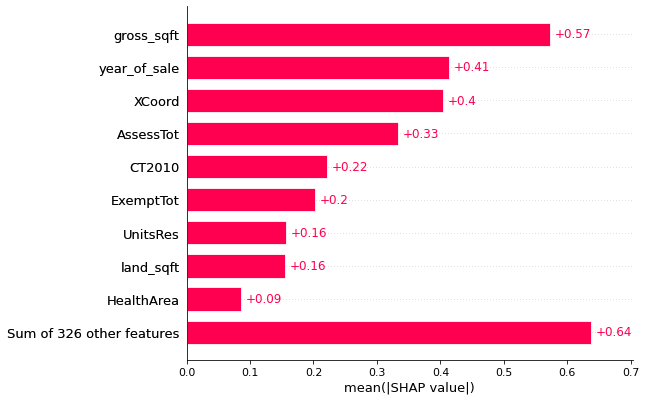

In [ ]:
shap.plots.bar(shap_values)

## 2. Classifying the price into 4 intervals (the quartiles)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a72cf3940>]],
      dtype=object)

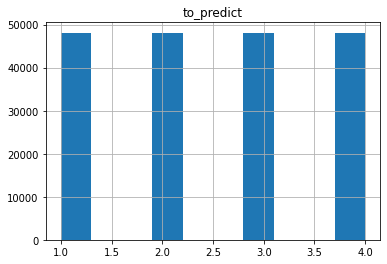

In [ ]:
import numpy as np
X = normalized.copy()
X["to_predict"]=1
X['to_predict'] = np.where((X.sale_price>stats['25%']),2,X.to_predict)
X['to_predict'] = np.where((X.sale_price>stats['50%']),3,X.to_predict)
X['to_predict'] = np.where((X.sale_price>stats['75%']),4,X.to_predict)
X = X.drop(axis=1, columns=['sale_price'])
X.hist(column="to_predict")

**XGB Classifier**

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split

y = X['to_predict']
X.drop('to_predict', inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


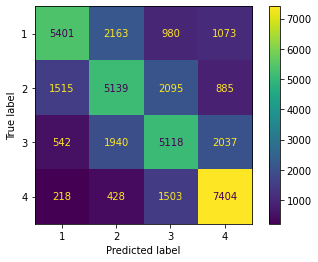

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report

model_xgb_2 = XGBClassifier().fit(X_train, y_train)
predict_xgb_2 = model_xgb_2.predict(X_test)
plot_confusion_matrix(model_xgb_2, X_test, y_test)
plt.show()

In [ ]:
accuracy_score (y_test, predict_xgb_2)

0.5999323638823132

In [ ]:
print(classification_report(y_test, predict_xgb_2))

              precision    recall  f1-score   support

           1       0.70      0.56      0.62      9617
           2       0.53      0.53      0.53      9634
           3       0.53      0.53      0.53      9637
           4       0.65      0.78      0.71      9553

    accuracy                           0.60     38441
   macro avg       0.60      0.60      0.60     38441
weighted avg       0.60      0.60      0.60     38441



**Gradient Boosting**

In [ ]:
from sklearn import datasets, ensemble
model_boost_2 = ensemble.GradientBoostingRegressor()
model_boost_2.fit(X_train, y_train)
predict_boost_2 = model_boost_2.predict(X_test)

In [ ]:
predict_boost_2=np.array(predict_boost_2)
predict_boost_2=np.around(predict_boost_2)

accuracy_score (y_test, predict_boost_2)

0.5035769100699774

In [ ]:
print(classification_report(y_test, predict_boost_2))

              precision    recall  f1-score   support

           1       0.84      0.40      0.55      9617
           2       0.47      0.68      0.55      9634
           3       0.37      0.64      0.47      9637
           4       0.85      0.29      0.43      9553

    accuracy                           0.50     38441
   macro avg       0.63      0.50      0.50     38441
weighted avg       0.63      0.50      0.50     38441

